In [80]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

## Simulate Poisson process

Generate sparse event in small time bins with fixed expected rateand compare with analytical Poisson distribution

In [103]:
###numerical
T = 1000  #seconds
dt = 0.01
rate = 10 #events per second
threshold = 1 - rate*dt;  #change threshold to fix event rate
timeseries = np.random.rand(int(T/dt))
timeseries[timeseries>threshold] = 1
timeseries[timeseries<=threshold] = 0

###analytical
Ns = np.linspace(0,30,30,dtype = int)
Pn = np.array([np.exp(-rate)*rate**nn/math.factorial(nn) for nn in Ns])

In [104]:
tau = 1  #in seconds
window = int(tau/dt)
samples = np.array([timeseries[tt:tt+window] for tt in range(0,len(timeseries)-window)])
samp_rate = np.sum(samples,axis=1)/tau

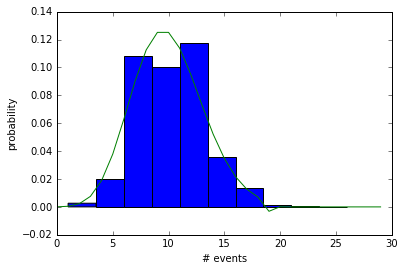

In [105]:
plt.hist(samp_rate,normed=True);
#plt.hold(True)
plt.plot(Pn,label='analytic')
plt.xlabel('# events')
plt.ylabel('probability')

## Anaylsis
What is the mean count? The variance? 

Do you have enough data to fill in the whole probability distribution $P_\tau (n)$ for counting $n$ of events in the window? 

How do all of these things change as you change $\tau$? 

What if you go back and make events with a different average rate? Do your numerical results agree with the theoretical expressions?

In [59]:
print('mean=',np.mean(samp_rate))
print('variance=',np.var(samp_rate))
print('ground truth=',rate)

mean= 10.166286286286287
variance= 8.969826348470594
ground truth= 10


In [60]:
def sim_Poisson(T,tau,rate):
    """
    Numerical Poisson process for parameter tuning
    """
    dt = 0.01
    threshold = 1 - rate*dt;
    timeseries = np.random.rand(int(T/dt))
    timeseries[timeseries>threshold] = 1
    timeseries[timeseries<=threshold] = 0
    window = int(tau/dt)
    samples = np.array([timeseries[tt:tt+window] for tt in range(0,len(timeseries)-window)])
    samp_rate = np.sum(samples,axis=1)/tau
    return samp_rate

In [61]:
rep = 10  #repeat test
means = np.array([np.mean(sim_Poisson(T,tau,rate)) for r in range(0,rep)])
varss = np.array([np.var(sim_Poisson(T,tau,rate)) for r in range(0,rep)])
print('mean=',np.mean(means),'±',np.std(means))
print('variance=',np.mean(varss),'±',np.std(varss))
print('ground truth=',rate)

mean= 10.019333333333332 ± 0.12276352887221169
variance= 8.879111602954307 ± 0.3779555831755696
ground truth= 10


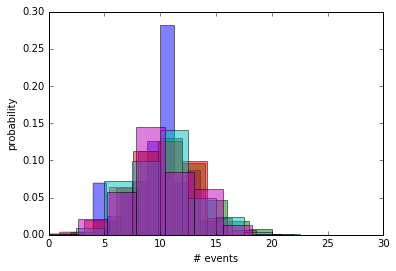

In [8]:
###scaling n events
Ts = np.logspace(1,5,num=5)
tau = 1
rate = 10
for ts in Ts:
    samp_rate = sim_Poisson(ts,tau,rate)
    plt.hist(samp_rate,normed=True,alpha=0.5);
plt.xlabel('# events')
plt.ylabel('probability')

###->distribution is quite stable under different length of simulated data

variance= 8.8321774518262
variance= 1.971257805004924
variance= 0.9035678279522498
variance= 0.6733099480457282
variance= 0.33939729254893797


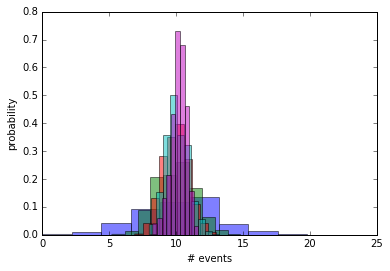

In [9]:
###changing tau
T = 1000
taus = np.array([1,5,10,15,20])
rate = 10
for tos in taus:
    samp_rate = sim_Poisson(T,tos,rate)
    plt.hist(samp_rate,normed=True,alpha=0.5);
    print('variance=',np.var(samp_rate))
plt.xlabel('# events')
plt.ylabel('probability')

###->the window of tau matters! The variance does not scale correctly when the window is too large

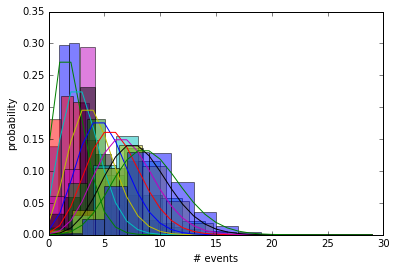

In [65]:
###different rate
T = 1000
tau = 1
rs = np.linspace(2,9,8)
means_rate = []
vars_rate = []
for rr in rs:
    samp_rate = sim_Poisson(T,tau,rr)
    means_rate.append(np.mean(samp_rate))
    vars_rate.append(np.var(samp_rate))
    plt.hist(samp_rate,normed=True,alpha=0.5);
    #theoretical
    Pn = np.array([np.exp(-rr)*rr**nn/math.factorial(nn) for nn in Ns])
    plt.plot(Pn)
plt.xlabel('# events')
plt.ylabel('probability')

###->distribution scales for different rate value and agrees with analytic form

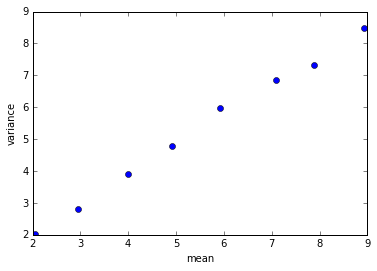

In [66]:
plt.plot(means_rate,vars_rate,'o')
plt.xlabel('mean')
plt.ylabel('variance')

###->mean follows the rate in simulation and the variance scales linearly, as Poisson should be

You should also make a histogram (hist should help) of the times  $\Delta t = t_{i+1} − t_i$ between successive events. The result should be an exponential, $P(\Delta t) \propto e^{-k\Delta t}$, and you should work to get it into a form where it is a properly normalized probability density. What is the connection between $k$ and the Poisson rate $\hat{r}$? 

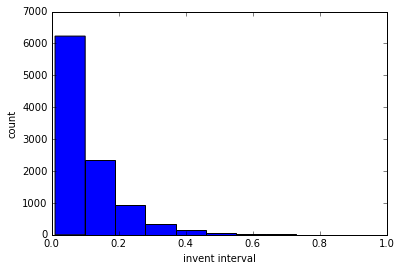

In [116]:
T = 1000  #seconds
dt = 0.01
rate = 10 #events per second
threshold = 1 - rate*dt;  #change threshold to fix event rate
timeseries = np.random.rand(int(T/dt))
timeseries[timeseries>threshold] = 1
timeseries[timeseries<=threshold] = 0

event_t = np.where(timeseries==1)[0]  #event bin intervals
interval = np.diff(event_t)*dt  #turning back to time unit
(n, bins, patches) = plt.hist(interval,bins=10);
plt.xlabel('invent interval')
plt.ylabel('count')

In [117]:
normed = n/max(n)
np.polyfit(bins[:-1], np.log(normed+10**-10), 1)  #fitting with y=Aexp(x) with logy=ax+b

array([-1.01362346e+01, -3.82869607e-03])

## Alternative by choosing time bins

Instead of deciding within each bin about the presence or absence of an event, use the command rand to choose $N$ random times in the big window $T$

In [14]:
N = 100  #random selection
rep = 1000  #repitition
ns = []  #selections
for rr in range(0,rep):
    select = np.random.choice(len(timeseries), N)
    subsampe = timeseries[select]
    ns.append(np.sum(subsampe)/(N*dt))

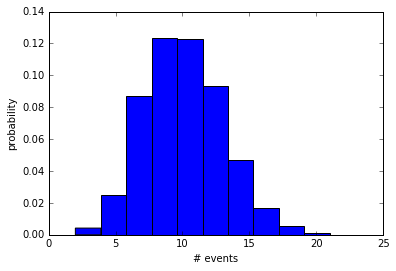

In [15]:
plt.hist(ns,normed=True);
plt.xlabel('# events')
plt.ylabel('probability')

Do you see connections to the statistical mechanics of ideal gases and the
equivalence of ensembles?

The sparse events with an expected rate in independent time bins can be described by the grand canonical ensemble of ieal gas. Where the events are indistinguishable particles and the number of events is the time window is the state (number of particles in a particular energy state, which is binary in this case). 

The number fluctuation follows a Poisson distribution with a expected number of particles within the time window.

reference:

http://bohr.physics.berkeley.edu/hal/teaching/phys230Sp17/notes/FoxQuantumOpticsChaps5and6.pdf
http://www.cmp.caltech.edu/~mcc/Ph127/a/Lecture_9.pdf
